# Simulating optical auto correlation of a pulsed laser (with chirp)

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import constants
from scipy import integrate
from IPython.core.debugger import set_trace

Electric field of the laser $E_0(t)$ is relative to the form:

$$ E_0(t) \sim f_0(t) = \frac{A}{\sqrt{2 \cdot \pi \cdot \tau_0^2}} \exp\left(-\frac{t^2}{2 \cdot \tau_0^2}\right)\exp(-i \omega t)$$

with the orginal pulse area $A$, the pulse duration $\tau_0$ and the central frequency $w$.

(see Glässl, M. et al. Biexciton state preparation in a quantum dot via adiabatic rapid passage: Comparison between two control protocols and impact of phonon-induced dephasing. Phys. Rev. B - Condens. Matter Mater. Phys. 87, 1–8 (2013).).

In [2]:
def E_0(t, A, tau_0, omega):
    return A / (2 * np.pi * tau_0**2) * np.exp(- t**2 / (2 * tau_0**2)) *  np.exp(-1j * omega * t)



MaiTai Laser | values
-----------|--------------
repitition rate| 80 MHz
center wavelength (tunable)| 700 nm to 1000 nm
power | 3.2 Watt
pulse duration | 100 fs - 20 ps

We start with the lowest pulse duration $\tau_0$ and choose for the central wavelength $\lambda$ 785 nm.

We choose 1 for the original pulse area $A$.

In [3]:
A_laser = 1
tau_0_laser = 100 * 10**(-15)
lambda_laser = 785 * 10**(-9)

omega_laser = 2 * np.pi * constants.c / lambda_laser

In [4]:
t_values_1 = np.linspace(-tau_0_laser * 2, tau_0_laser * 2, 3200)
E_values_1 = E_0(t_values_1, A_laser, tau_0_laser, omega_laser)

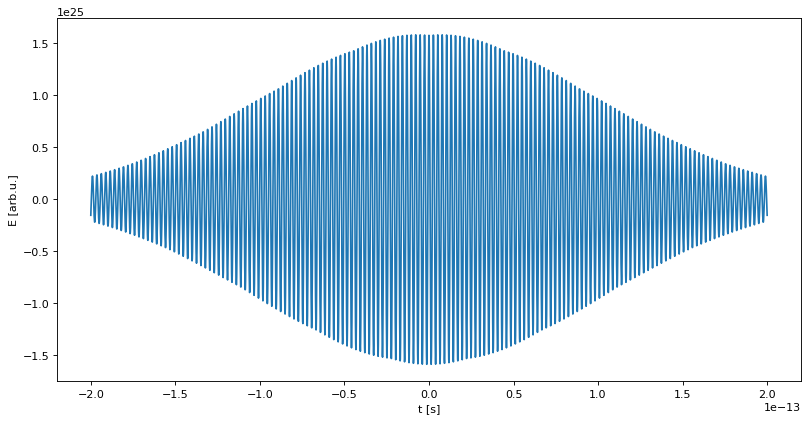

In [5]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(12, 6), dpi=80)

plt.xlabel("t [s]")
plt.ylabel("E [arb.u.]")

plt.plot(t_values_1, np.real(E_values_1))
plt.show()

# Interferometric autocorrelation

![Setup for an interferometric autocorrelator](https://upload.wikimedia.org/wikipedia/en/d/dd/Optical-interferometric-autocorrelation-setup.png)

Setup for an interferometric autocorrelator, similar to the field autocorrelator above, with the following optics added:
- **L**: converging lens,
- **SHG**: second-harmonic generation crystal,
- **F**: spectral filter to block the fundamental wavelength.

(see https://en.wikipedia.org/wiki/Optical_autocorrelation)

The intensity recorded by the detecter is:

$$ I_M(\tau) = \int_{-\infty}^{+\infty}|(E(t)+E(t-\tau))^2|^2dt $$

In [6]:
# Pfuscher Lösung mit verändertem tau_0_laser

#A_laser = 1
#tau_0_laser = 100 
#lambda_laser = 785 * 10**(-9)

#omega_laser = 2 * np.pi * constants.c / lambda_laser

In [7]:
def I_M(tau_values, A, tau_0, omega):
    I_M_values = np.array(())
    for tau in tau_values:
        func = lambda t: np.abs((E_0(t, A, tau_0, omega) + E_0(t - tau, A, tau_0, omega))**2)**2
        # "[0]" because quad returns array, with "[1]" being the error
        # set_trace()
        I_M_values = np.append(I_M_values, integrate.quad(func, - np.inf, np.inf)[0])        
    return I_M_values

In [8]:
tau_values_2 = np.linspace(-tau_0_laser * 2, tau_0_laser * 2, 3000)
I_M_values_2 = I_M(tau_values_2, A_laser, tau_0_laser, omega_laser)

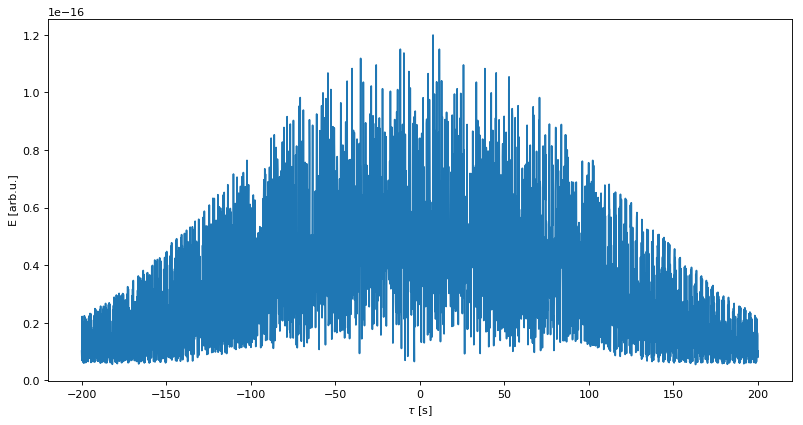

In [9]:
# Create a figure of size 8x6 inches, 80 dots per inch
plt.figure(figsize=(12, 6), dpi=80)

plt.xlabel(r"$\tau$ [s]")
plt.ylabel("E [arb.u.]")

plt.plot(tau_values_2, I_M_values_2)
plt.show()